# WEEK 5


# Cohort and Segment Analysis

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv(r"C:\Users\dhana\Downloads\Updated_Dataset.csv")
df.head(5)

,Age,Age_Group,Gender,Avg_Daily_Screen_Time_hr,awareness,Primary_Device,Device_Category,Screen_Size,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Health_Impact_Category,Urban_or_Rural
0,14,Teenagers,Male,3.99,Need Attention,Smartphone,Portable,<30,True,0.42,"Poor Sleep, Eye Strain",Both Physical and Mental,Urban
1,11,Pre-teens,Female,4.61,Need Attention,Laptop,Portable,<30,True,0.30,Poor Sleep,Mental,Urban
2,18,Late teens,Female,3.73,Need Attention,TV,Wallmounted,>30,True,0.32,Poor Sleep,Mental,Urban
3,15,Teenagers,Female,1.21,No harm,Laptop,Portable,<30,False,0.39,No health impacts,No Impact,Urban
4,12,Pre-teens,Female,5.89,Need Attention,Smartphone,Portable,<30,True,0.49,"Poor Sleep, Anxiety",Mental,Urban


In [8]:
cohort_analysis = df.groupby(['Age_Group', 'Primary_Device'])['Avg_Daily_Screen_Time_hr'].mean().reset_index()
Top_cohorts = cohort_analysis.sort_values(by='Avg_Daily_Screen_Time_hr', ascending=False).head(10)
print(Top_cohorts)


     Age_Group Primary_Device  Avg_Daily_Screen_Time_hr
10   Teenagers             TV                  4.586816
3   Late teens         Tablet                  4.555843
0   Late teens         Laptop                  4.549853
1   Late teens     Smartphone                  4.540847
9    Teenagers     Smartphone                  4.508386
2   Late teens             TV                  4.477568
11   Teenagers         Tablet                  4.461235
4    Pre-teens         Laptop                  4.449055
8    Teenagers         Laptop                  4.420928
5    Pre-teens     Smartphone                  4.209501


**Understanding the Top Cohorts Table**

- The table shows which age group and device combinations have the **highest average daily screen time**.
- Each row is a unique cohort (e.g., "Teenagers-TV", "Late teens-Laptop") and the right column shows their average hours.
- This lets you quickly spot the riskiest age + device groups for heavy screen use.


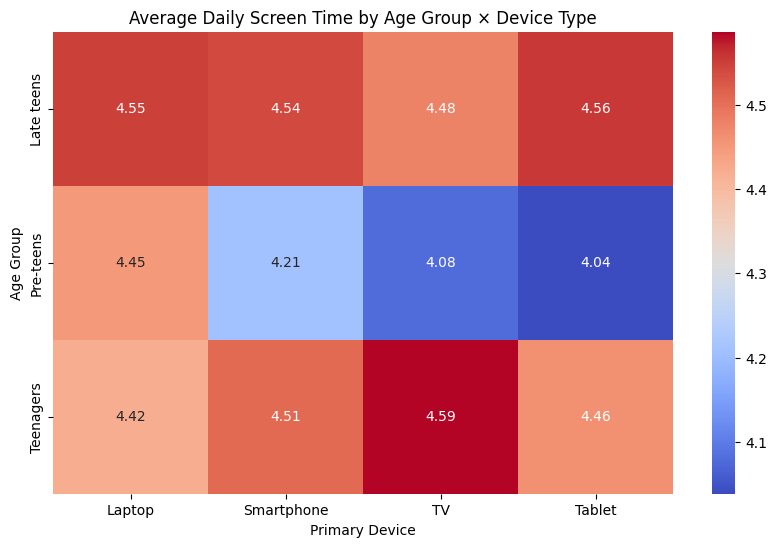

In [10]:
cohort = df.groupby(['Age_Group', 'Primary_Device'])['Avg_Daily_Screen_Time_hr'].mean().reset_index()

# Pivot for heatmap 
cohort_pivot = cohort.pivot(index='Age_Group', columns='Primary_Device', values='Avg_Daily_Screen_Time_hr')

# Heatmap visualization
plt.figure(figsize=(10,6))
sns.heatmap(cohort_pivot, annot=True, fmt=".2f", cmap="coolwarm")  # Changed color palette

plt.title("Average Daily Screen Time by Age Group × Device Type")
plt.xlabel("Primary Device")
plt.ylabel("Age Group")
plt.show()


**Understanding the Heatmap: Average Daily Screen Time by Age Group × Device Type**

- Each cell shows the *average hours of screen time* for a specific age group and device (like "Late teens - Tablet").
- Darker colors mean higher average usage within the group.
- This visualization helps you quickly spot which device-age combinations are the heaviest users.



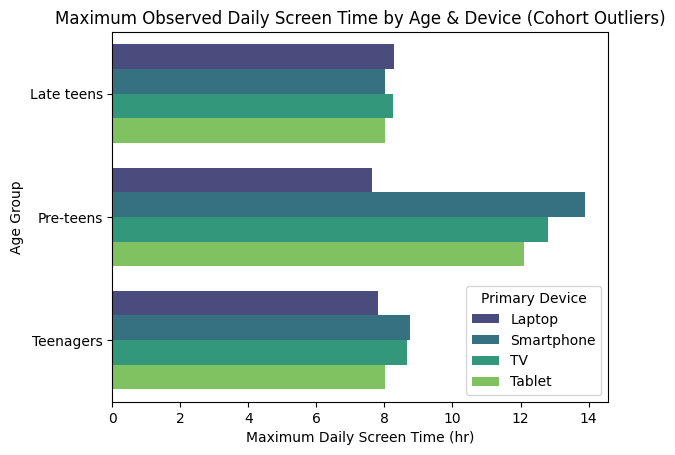

In [13]:
# Outlier Analysis: Who are the 'extreme screeners'? (longest average screen time)
outlier_cohort = df.groupby(['Age_Group', 'Primary_Device'])['Avg_Daily_Screen_Time_hr'].max().reset_index()

# Horizontal bar chart with a new color palette
sns.barplot(
    data=outlier_cohort,
    y='Age_Group',
    x='Avg_Daily_Screen_Time_hr',
    hue='Primary_Device',
    palette='viridis',   # Changed color palette
    orient='h'           # Changed chart orientation
)

plt.title('Maximum Observed Daily Screen Time by Age & Device (Cohort Outliers)')
plt.xlabel('Maximum Daily Screen Time (hr)')
plt.ylabel('Age Group')
plt.legend(title='Primary Device', loc='lower right')
plt.show()


**Understanding the Heatmap: Average Daily Screen Time by Age Group × Device Type**

- Each cell shows the *average hours of screen time* for a specific age group and device (like "Late teens - Tablet").
- Darker colors mean higher average usage within the group.
- This visualization helps you quickly spot which device-age combinations are the heaviest users.


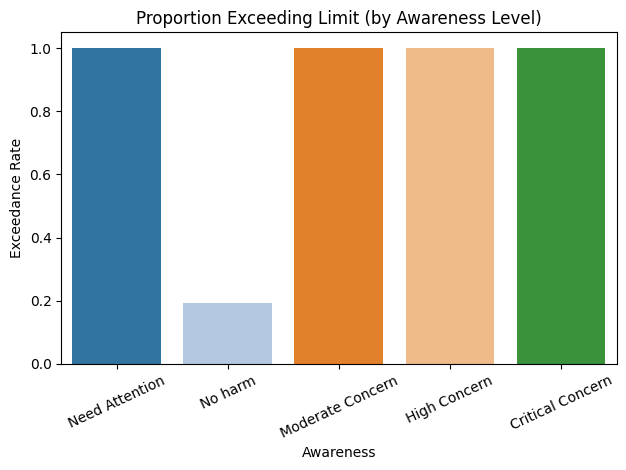

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.barplot(
    x='awareness', 
    y='Exceeded_Recommended_Limit',
    data=df, 
    estimator=np.mean, 
    errorbar=None, 
    palette='tab20',
    hue='awareness',        # assign awareness as hue for future compatibility
    legend=False
)
plt.title('Proportion Exceeding Limit (by Awareness Level)')
plt.ylabel('Exceedance Rate')
plt.xlabel('Awareness')
plt.xticks(rotation=25)     # Rotate x labels for clarity
plt.tight_layout()          # Prevent text overlap
plt.show()



**Understanding the Barplot: Proportion Exceeding Screen Time Limit by Awareness Level**

- Each bar shows the *fraction of users* in an awareness category (e.g. "Need Attention", "No harm") who exceed the recommended screen time limit.
- Taller bars mean more users in that group are overusing screens.
- Helps you spot which awareness groups need targeted intervention.


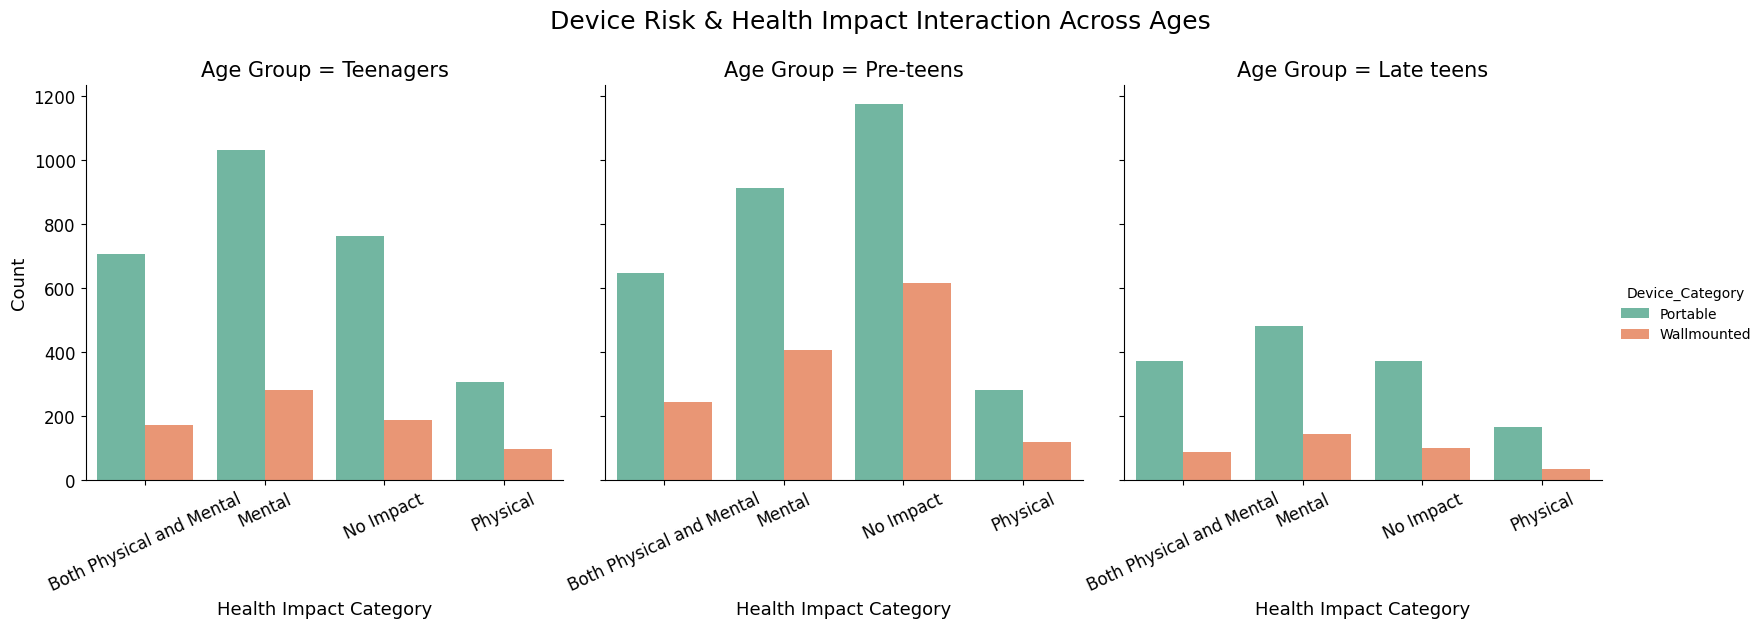

In [14]:
g = sns.catplot(
    x='Health_Impact_Category', 
    hue='Device_Category', 
    col='Age_Group', 
    data=df, 
    kind='count', 
    height=5.4, 
    aspect=1,
    palette='Set2'   # Changed color palette
)

g.set_titles('Age Group = {col_name}', size=15)
g.set_axis_labels('Health Impact Category', 'Count', fontsize=13)
g.fig.subplots_adjust(top=0.84)
g.fig.suptitle('Device Risk & Health Impact Interaction Across Ages', fontsize=18)

plt.draw()
for ax in g.axes.flatten():
    ax.tick_params(axis='x', labelsize=12, rotation=25)
    ax.tick_params(axis='y', labelsize=12)

plt.show()


**Understanding the Clustered Barplot: Device Risk & Health Impact Interaction Across Ages**

- Each subplot shows an age group (Teenagers, Pre-teens, Late teens).
- Bars represent *user counts* for each combination of health impact and device category—Portable vs Wallmounted.
- You can instantly compare device risk and health impact within each age.


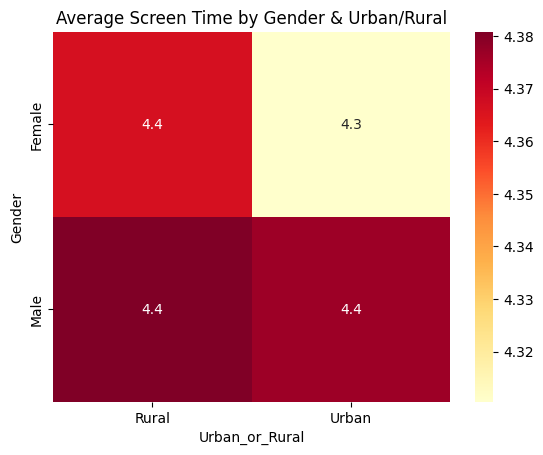

In [59]:
pivot = pd.pivot_table(
    df, index='Gender', columns='Urban_or_Rural', 
    values='Avg_Daily_Screen_Time_hr', aggfunc='mean'
)
sns.heatmap(pivot, annot=True, cmap='YlOrRd')
plt.title('Average Screen Time by Gender & Urban/Rural')
plt.show()



**Understanding the Heatmap: Average Screen Time by Gender & Urban/Rural**

- Each cell shows the *mean daily screen time* for a combination of gender and location.
- You can spot differences between males and females, and between urban and rural kids, at a glance.
- Darker shades mean higher average use for that segment.


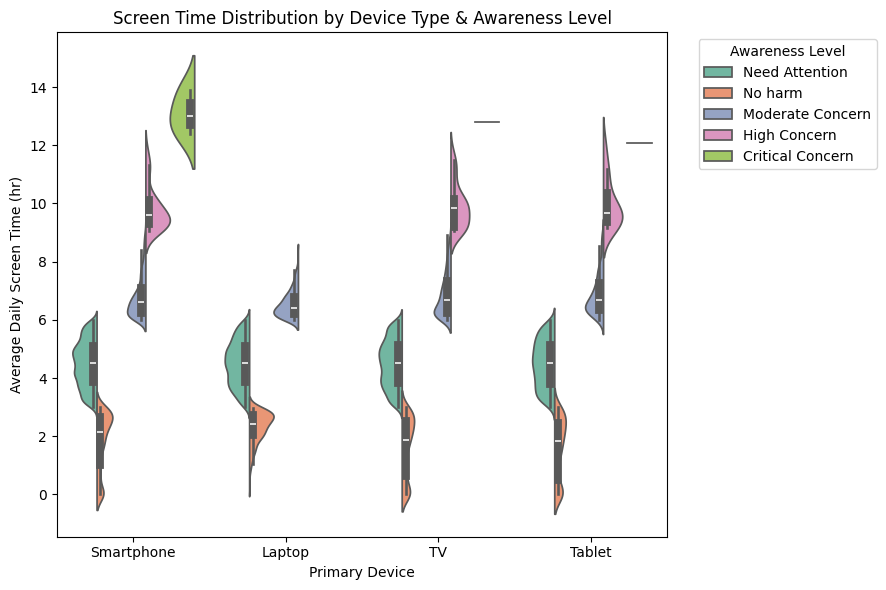

In [64]:
plt.figure(figsize=(9,6))
sns.violinplot(
    data=df,
    x='Primary_Device',
    y='Avg_Daily_Screen_Time_hr',
    hue='awareness',
    split=True,          # Split the violin for each awareness level
    palette='Set2',
    inner='box'          # Show the boxplot inside the violin
)
plt.title("Screen Time Distribution by Device Type & Awareness Level")
plt.xlabel("Primary Device")
plt.ylabel("Average Daily Screen Time (hr)")
plt.legend(title="Awareness Level", bbox_to_anchor=(1.04, 1), loc="upper left")
plt.tight_layout()
plt.show()


**Understanding the Violin Plot: Screen Time by Device Type & Awareness Level**

- Each violin shows the *distribution of daily screen time* for a device, split by awareness level.
- Wider sections mean more users with that screen time.
- The box inside the violin marks the median and quartiles.
- Instantly compare how both device and awareness influence time risk.


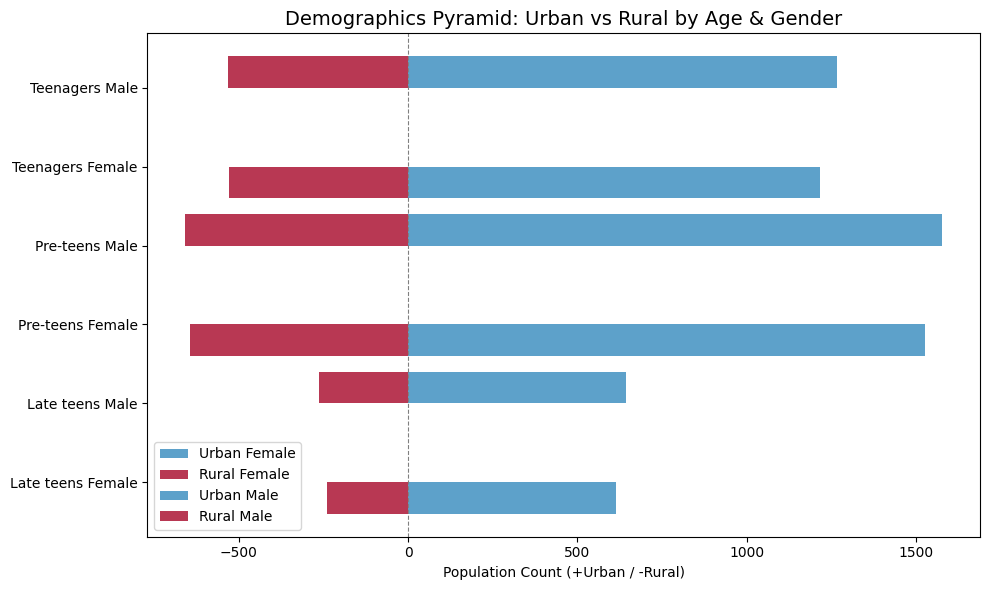

In [65]:
pyramid = df.groupby(['Age_Group', 'Gender', 'Urban_or_Rural']).size().unstack(fill_value=0).reset_index()

# Assign position
pyramid['Pos'] = np.arange(len(pyramid))

# Plot
plt.figure(figsize=(10,6))
bar_w = 0.4

for i, g in enumerate(pyramid['Gender'].unique()):
    sub = pyramid[pyramid['Gender'] == g]
    plt.barh(sub['Pos'] + (i-0.5)*bar_w, sub['Urban'],  bar_w, color='#348ABD', alpha=0.8, label=f'Urban {g}')
    plt.barh(sub['Pos'] + (i-0.5)*bar_w, -sub['Rural'], bar_w, color='#A60628', alpha=0.8, label=f'Rural {g}')

plt.axvline(0, color='gray', lw=0.8, ls='--')
plt.yticks(pyramid['Pos'], pyramid[['Age_Group', 'Gender']].astype(str).agg(' '.join, axis=1))
plt.title("Demographics Pyramid: Urban vs Rural by Age & Gender", fontsize=14)
plt.xlabel("Population Count (+Urban / -Rural)")
plt.legend()
plt.tight_layout()
plt.show()

**Understanding the Demographics Pyramid: Urban vs Rural by Age & Gender**

- Each horizontal bar shows the population of a group (e.g. "Teenagers Male", "Late teens Female").
- Blue bars (right) represent urban users, red bars (left) represent rural users.
- You can instantly compare the presence of males and females, by age, in urban and rural settings.
- This helps spot under- or over-represented groups by both location and gender.


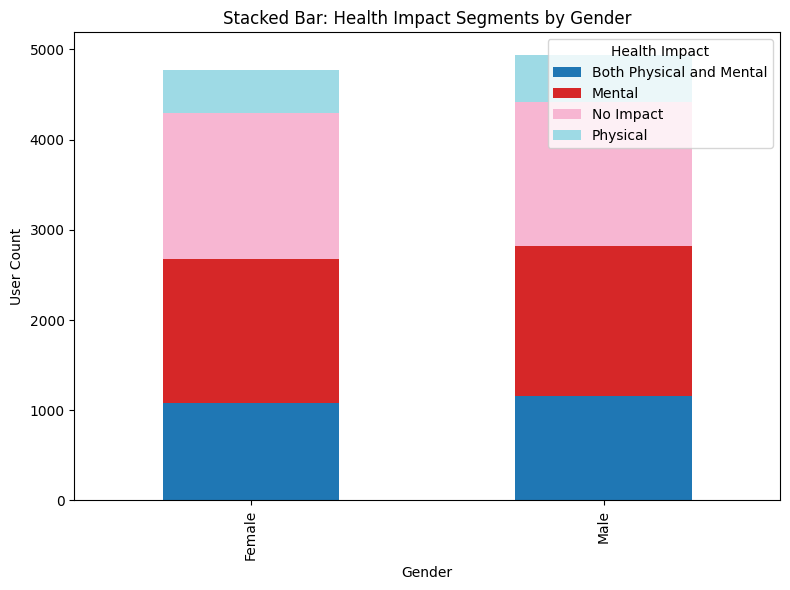

In [69]:
health_gender = pd.crosstab(df['Gender'], df['Health_Impact_Category'])
health_gender.plot(
    kind='bar', stacked=True, colormap='tab20', figsize=(8,6)
)
plt.title('Stacked Bar: Health Impact Segments by Gender')
plt.xlabel('Gender')
plt.ylabel('User Count')
plt.legend(title='Health Impact')
plt.tight_layout()
plt.show()


**Understanding the Stacked Bar: Health Impact Segments by Gender**

- Each bar represents female or male users, segmented by health impact category (physical, mental, etc.).
- The colored segments show how many users in each gender report each type of impact.
- Lets you compare not only overall counts, but also health impact proportions within each gender.


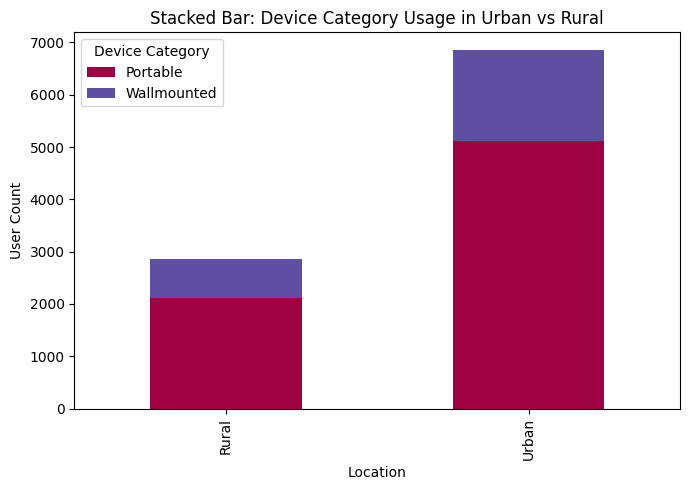

In [70]:
device_loc = pd.crosstab(df['Urban_or_Rural'], df['Device_Category'])
device_loc.plot(
    kind='bar', stacked=True, figsize=(7,5), colormap='Spectral'
)
plt.title('Stacked Bar: Device Category Usage in Urban vs Rural')
plt.xlabel('Location')
plt.ylabel('User Count')
plt.legend(title='Device Category')
plt.tight_layout()
plt.show()


**Stacked Bar: Device Category Usage in Urban vs Rural**

- Each bar shows *user count* for Urban and Rural locations, split into Portable and Wallmounted device categories.
- The chart compares the prevalence of device types between urban and rural populations.
- Taller “Portable” segments indicate much higher access/use of portable devices in cities.


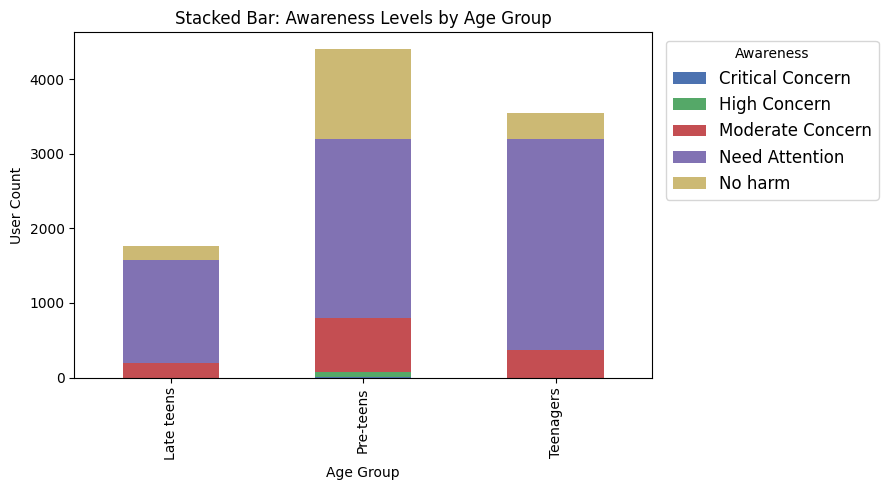

In [72]:
import matplotlib.pyplot as plt
import pandas as pd

aware_age = pd.crosstab(df['Age_Group'], df['awareness'])
custom_colors = ['#4C72B0', '#55A868', '#C44E52', '#8172B3', '#CCB974', '#64B5CD']
aware_age.plot(
    kind='bar',
    stacked=True,
    figsize=(9,5),
    color=custom_colors  # Pick any distinct hex codes
)
plt.title('Stacked Bar: Awareness Levels by Age Group')
plt.ylabel('User Count')
plt.xlabel('Age Group')
plt.legend(title='Awareness', bbox_to_anchor=(1.01, 1), loc='upper left', fontsize=12)
plt.tight_layout()
plt.show()


**Stacked Bar: Awareness Levels by Age Group**

- Bars represent the number of users in each age group, sub-divided by their awareness level.
- Distinct colors show different levels (Critical Concern, High Concern, Moderate Concern, Need Attention, No Harm).
- Lets you compare *awareness composition* across ages and quickly spot where high concern or lack of awareness cluster.


**Overall Summary of Data Insights**

- **Top Screen-Time Cohorts:** The highest average daily screen time occurs among teenagers and late teens using TVs, tablets, or laptops, making these groups the riskiest for overuse.
- **Cohort Risk Structure (Heatmap):** Heatmaps confirm that both device type and age affect average usage. Teenagers on TV and tablets, and late teens on laptops, have especially high screen hours.
- **Awareness vs Overuse:** Groups showing higher awareness of screen risks ("Need Attention", "Critical Concern") tend to have higher screen time exceedance rates—suggesting awareness doesn't always reduce overuse.
- **Health Impact Clustering:** Health impact types (mental, physical, both, or none) vary by gender; stacked bars show both males and females most frequently report mental and "no impact", with some differences in proportions.
- **Device Risk & Health (Clustered Bars):** Portable devices are far more common than wall-mounted ones, with mental and both-impacts being most prevalent across all age cohorts.
- **Gender & Location:** Heatmaps reveal small but noticeable differences in average screen time by gender (male/female) and living environment (urban/rural); rural-urban gaps are generally small, but structure may change by group.
- **Awareness by Age:** Stacked analysis shows most "Need Attention" and "Moderate Concern" cases are concentrated in pre-teens and teenagers—highlighting targets for policy.
- **Demographics Pyramid:** Urban youth (male and female) vastly outnumber rural counterparts, with a greater gap for pre-teens than for late teens or teenagers.
- **Device Access by Location:** Urban children use both portable and wall-mounted devices more than rural peers, but the domination is especially strong for portable devices.
- **Distribution Analysis:** Violin plots reveal outliers and risk tails—certain subgroups (e.g., high-awareness + smartphone users) reach 12+ hours of screen time.
- **Cohort Detail & Uniqueness:** Clustered, stacked, and split visualizations (including box, violin, and heatmaps) offer deep comparisons and multi-segment risk profiling not visible from averages alone.
